# Разведочный анализ данных рынка общественного питания в Москве

- Автор: Чезганов Алексей
- Дата: 6.02.26

## Цели и задачи проекта

**Цель:**  
Провести исследовательский анализ рынка общественного питания Москвы и подготовить рекомендации для инвесторов.

**Основные задачи:**
- загрузить и объединить данные из нескольких источников;
- выполнить предобработку данных (типы, пропуски, дубликаты);
- провести исследовательский анализ:
  - распределения заведений по категориям и районам;
  - соотношение сетевых и несетевых заведений;
  - анализ посадочных мест, рейтингов и цен;
  - поиск факторов, влияющих на рейтинг заведений;
- сформулировать итоговые выводы и рекомендации для заказчика.

## Описание данных

Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — `5.0`);
- `chain` — число, выраженное `0` или `1`, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - `0` — заведение не является сетевым;
    - `1` — заведение является сетевым.
- `seats` — количество посадочных мест.

Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽».
        
        и так далее;
        
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

## Содержимое проекта

1. Цели и задачи проекта  
2. Описание данных  

3. Содержание проекта  

4. Преобразование типов полей  

5. Обработка пропущенных значений  

6. Поиск и удаление явных и неявных дубликатов  
   6.1 Нормализация значений  
   6.2 Поиск и удаление явных дубликатов  

7. Извлечение из `hours` записи круглосуточных заведений.  

8. Итоговый вывод по предобработке  

9. Распределение количества объектов общественного питания по категориям  

10. Изучение количества заведений по административным районам  

11. Соотношение сетевых и несетевых заведений в разрезе категорий заведений.  

12. Исследование количества посадочных мест в заведениях.  

13. Исследование рейтинга заведений  

14. Корреляции с рейтингом заведений  

15. Топ-15 сетей ОП  

16. Вариация среднего чека заведения в зависимости от района  

17. Итоговый вывод и рекомендации

# Загрузка данных и знакомство с ними

Данный блок состоит из следующих этапов:
1. Импорт библиотек.
2. Загрузка датасетов.
3. Знакомство непосредственно с данными.

###  Импорт библиотек

In [1]:
# Установка сторонней бибилотеки
#!pip install phik

In [2]:
# Загружаем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации
import seaborn as sns
import matplotlib.pyplot as plt

# Загружаем библиотеку для вычисления коэф. корреляции phi_k
from phik import phik_matrix

# Загружаем библиотеки для работы со строками
import re

### Загрузка датасетов

In [3]:
# Выгружаем данные в переменные rest_info и rest_price

rest_info = pd.read_csv('datasets/rest_info.csv')
rest_price = pd.read_csv('datasets/rest_price.csv')

### Знакомство с данными

Для ознакомления с данными в каждом датасете выведем общую информацию и первые 5 строк.

In [4]:
# Выводим первые 5 строк из датафрейма rest_info
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
# Выводим общую информацию о датафрейме rest_info
rest_info.info()

<class 'pandas.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   str    
 1   name      8406 non-null   str    
 2   category  8406 non-null   str    
 3   address   8406 non-null   str    
 4   district  8406 non-null   str    
 5   hours     7870 non-null   str    
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), str(6)
memory usage: 591.2 KB


In [6]:
# Выведем минимальные и минимальные значения числовых признаков
rest_info[['seats', 'rating', 'chain']].agg(['max', 'min'])

,seats,rating,chain
max,1288.0,5.0,1
min,0.0,1.0,0


In [7]:
# Убедимся, что значения в поле chain принимают значения 0 или 1
rest_info['chain'].value_counts()

chain
0    5201
1    3205
Name: count, dtype: int64

**Промежуточный вывод:**

Датафрейм `reset_info` содержит 8406 записей. Данные представлены преимущественно строковым типом. В приведении к общему виду и переименованию полей нет необходимости. 

- Поле `chain` необоснованно имеет тип `int64`, так как, исходя из описания, данные в этом поле могут быть представлены `0` или `1` (Данные в датасете соответствуют описанию). 
- Поля `seats` и `rating` требуется привести к менее затратному по памяти целочисленному или вещественному типу. 
- Поле `hours` требуется разбить на категориальные и числовые признаки.

In [8]:
# Выводим первые 5 строк из датафрейма rest_price
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [9]:
# Выводим общую информацию о датафрейме rest_price
rest_price.info()

<class 'pandas.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   str    
 1   price              3315 non-null   str    
 2   avg_bill           3816 non-null   str    
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), str(3)
memory usage: 158.6 KB


In [10]:
# Изучим диапазон числовых признаков
rest_price[['middle_avg_bill', 'middle_coffee_cup']].agg(['max', 'min'])

,middle_avg_bill,middle_coffee_cup
max,35000.0,1568.0
min,0.0,60.0


**Комментарий:** 
Датафрейм `rest_price` содержит 4057 записей, данные представлены строковыми и вещественными типами данных. Изменение типов не требуется. 

Поля `middle_avg_bill` и `middle_coffee_cup` необходимо сжать до `float16`. Проверка минимальных и максимальных значений демонстрирует эту возможность. 

Отдельно можно заметить, что размерность датафрейма `rest_price` в ~2 раза меньше, чем `rest_info`, следовательно при слиянии пропусков будет НЕМАЛО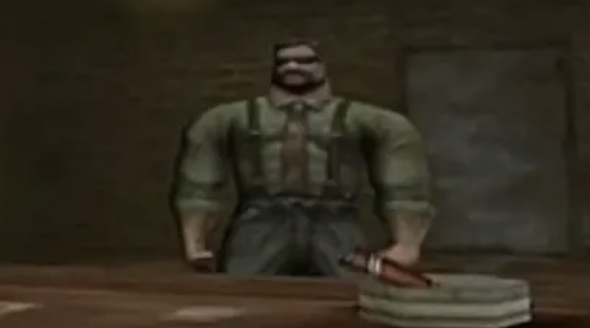

### Подготовка единого датасета

In [11]:
# Выполняем слияние датафреймов

df = pd.merge(rest_info, rest_price, how='left', on='id')

# Выведем первые 5 записей объединенного датафрейма
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [12]:
# Выведем общую информацию об объединенном датафрейме 
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   str    
 1   name               8406 non-null   str    
 2   category           8406 non-null   str    
 3   address            8406 non-null   str    
 4   district           8406 non-null   str    
 5   hours              7870 non-null   str    
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   str    
 10  avg_bill           3816 non-null   str    
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), str(8)
memory usage: 853.9 KB


# Предобработка данных

Данный блок состоит из следующих этапов: 

1. Преобразование типов полей.
2. Обработка пропущенных значений.
3. Поиск и удаление явных и неявных дубликатов.
4. Разбиение полей `avg_bill` и `hours` на категориальные и числовые признаки.

## Преобразование типов полей

На этапе знакомства мы наметили следующие преобразования:
- Поле `chain` необоснованно имеет тип `int64`, преобразуем в `bool`.
- Поле `rating` требуется привести к `int8`, в случае с `rating` предварительно сместив вещественую часть на порядок влево.
- Поле `seats` к `float16`, так как нам нужно сохранить пропуски.
- Поля `middle_avg_bill` и `middle_coffee_cup` требуется сжать до `float16`.

In [13]:
# Выполним преобразование поля chain
df['chain'] = df['chain'].astype(bool)

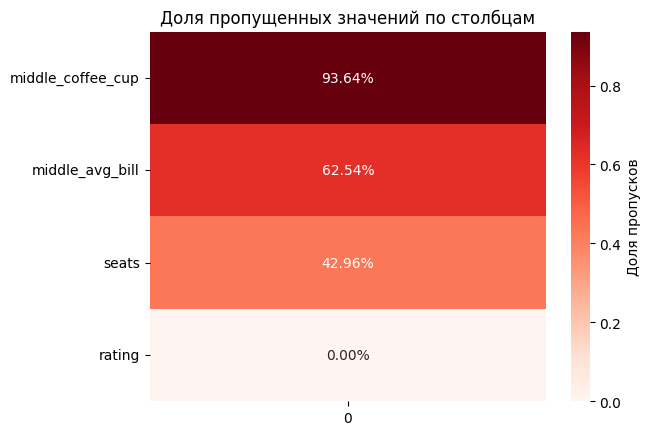

In [14]:
# Перед тем как продолжить преобразвание необходимо проверить наличие пропусков

# Считаем процент пропусков
missing_ratio = df[['rating', 'seats', 'middle_avg_bill', 'middle_coffee_cup']].isna().mean().sort_values(ascending=False)

# Создаем тепловую карту
sns.heatmap(missing_ratio.to_frame(),  # Преобразуем в нужный формат
            annot=True,
            fmt='.2%',
            cmap='Reds',
            cbar_kws={'label': 'Доля пропусков'},)

plt.title('Доля пропущенных значений по столбцам')
plt.show()

В поле `rating` пропусков не обнаружено, следовательно можно смело выполнять преобразование. 

У других полей обнаружено (НЕМАЛО) пропусков, от **42.96%** до **93.64%**, следовательно, их придется сохранить (пропуски), преобразовывать будем к `float16`. 

In [15]:
# Выполняем преобразование rating

# Выполним сдвиг десятичного разделителя
df['rating'] = df['rating'] * 10

# Непосредственное преобразование
df['rating'] = df['rating'].astype('int8')

In [16]:
# Выполняем преобразование seats, middle_avg_bill и middle_coffee_cup

df['seats'] = df['seats'].astype('float32') # Эмпирическим путем было установлено, float16 приводик к ошибкам
change_cols = ['middle_avg_bill', 'middle_coffee_cup']
df[change_cols] = df[change_cols].astype('float16')

In [17]:
# Выведем результат преобразований
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   str    
 1   name               8406 non-null   str    
 2   category           8406 non-null   str    
 3   address            8406 non-null   str    
 4   district           8406 non-null   str    
 5   hours              7870 non-null   str    
 6   rating             8406 non-null   int8   
 7   chain              8406 non-null   bool   
 8   seats              4795 non-null   float32
 9   price              3315 non-null   str    
 10  avg_bill           3816 non-null   str    
 11  middle_avg_bill    3149 non-null   float16
 12  middle_coffee_cup  535 non-null    float16
dtypes: bool(1), float16(2), float32(1), int8(1), str(8)
memory usage: 607.6 KB


**Промежуточный вывод:** 

В результате оптимизации типов данных объем памяти, занимаемый датасетом, был сокращен с **853.9 KB** до **591.2 KB**. 

Ключевые преобразования:

1. Поле `chain` было преобразовано к типу `bool`. 
2. Поле `rating` было преобразовано к типу `int8`, также было совершен сдвиг десятичного разделителя, в следствии чего диапазон изменился: (**1.0-5.0**) --> (**10-50**)
3. Поля `seats`, `middle_avg_bill` и `middle_coffee_cup` были преобразованы к типу `float16`.

## Обработка пропущенных значений

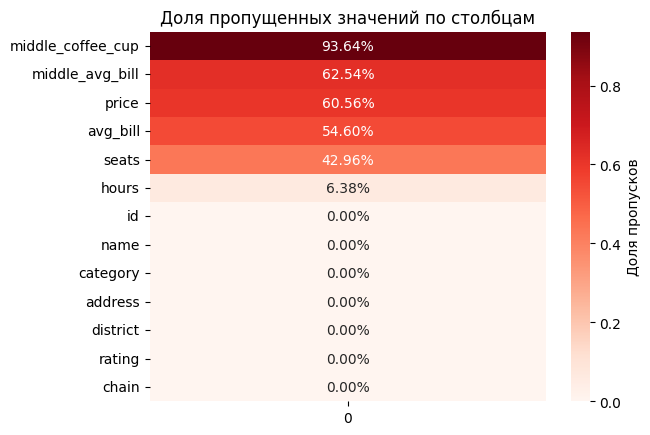

In [18]:
# Выведем информацию о пропусках во всех полях датасета

# Считаем процент пропусков
missing_ratio_all = df.isna().mean().sort_values(ascending=False)

# Создаем тепловую карту
sns.heatmap(missing_ratio_all.to_frame(),  # Преобразуем в нужный формат
            annot=True,
            fmt='.2%',
            cmap='Reds',
            cbar_kws={'label': 'Доля пропусков'},)

plt.title('Доля пропущенных значений по столбцам')
plt.show()

**Промежуточный вывод:** 

Ожидаемо большинство пропусков наблюдается с полях, изначально принадлежавших датафрейму `rest_price`. Это напрямую связано с разницей в количествах записей в изначальных датафреймах и методом сляния `left join`. 

Избавляться от этих пропусков нельзя, также как и от пропусков в поле `seats`. 

Однако их можно заменить, конкретнее: 

Для числовых полей `middle_avg_bill`, `middle_coffee_cup`, `seats` пропуски заполнять не будем. 

Строковые поля `price`, `avg_bill` заменим на `нет данных`.

Перед тем как продолжить, обратим внимание на данные, которые содержат пропуски во всех ключевых полях. А именно: `seats`, `hours`, `avg_bill` и `price`.


In [19]:
# Посчитаем количество записей с пропусками во всех ключевых полях
count_of_empty_lines = df[(df['hours'].isna()) 
                        & (df['seats'].isna()) 
                        & (df['avg_bill'].isna()) 
                        & (df['price'].isna())].shape[0]

# Выведем % таких записей
round(count_of_empty_lines * 100 / df.shape[0], 2)

2.8

Мы можем сделать вывод о том, что таких данных не много (менее 3%) и мы можем от них избавиться, так как они не несут аналитической ценности. (ну кроме факта наличия, конечно) 

In [20]:
# Удаляем только те строки, где ВСЕ указанные столбцы содержат NaN
df = df.dropna(subset=['hours', 'seats', 'avg_bill', 'price'], how='all').reset_index(drop=True)

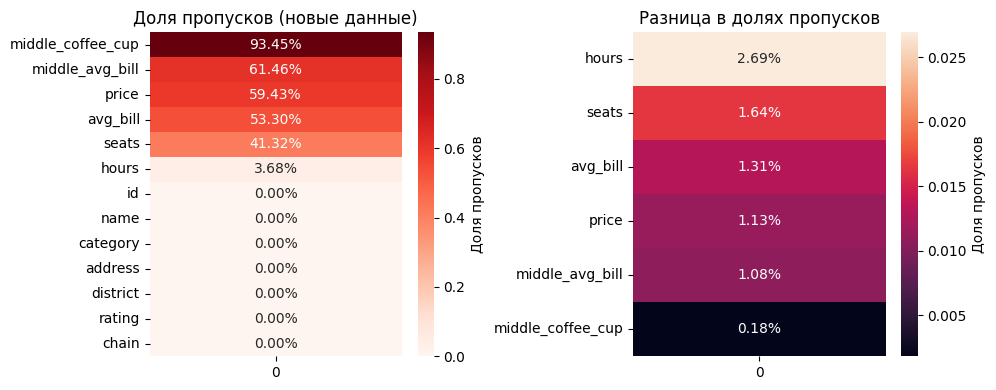

In [21]:
# Посмотрим как удаление отразидось на % пропусков в каждом поле

plt.figure(figsize=(10, 4))

# Обновим проценты пропусков 
missing_ratio_new = df.isna().mean().sort_values(ascending=False)

# Первый график (Результат) 
plt.subplot(1, 2, 1)
sns.heatmap(missing_ratio_new.to_frame(),
            annot=True,
            fmt='.2%',
            cmap='Reds',
            cbar_kws={'label': 'Доля пропусков'})
plt.title('Доля пропусков (новые данные)')

# Зафиксируем изменение
missing_ratio_diff = missing_ratio_all - missing_ratio_new
missing_ratio_diff = missing_ratio_diff[missing_ratio_diff != 0].sort_values(ascending=False)

# Второй график (Дельта)
plt.subplot(1, 2, 2)
sns.heatmap(missing_ratio_diff.to_frame(),
            annot=True,
            fmt='.2%',
            cbar_kws={'label': 'Доля пропусков'})
plt.title('Разница в долях пропусков')

plt.tight_layout()
plt.show()

Проведенная предварительная очистка данных оказала незначительное влияние на общее распределение пропусков. Это помогло принять решения об удалении строк с пропусками в поле `hours`. Исходная доля пропусков в этом поле составляла **6,38%**, что незначительно превышало допустимый порог в **5%** для автоматического удаления без дополнительного анализа.

In [22]:
# Удаляем строки содержащие пропуски в hours

df = df.dropna(subset=['hours']).reset_index(drop=True)
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7870 entries, 0 to 7869
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7870 non-null   str    
 1   name               7870 non-null   str    
 2   category           7870 non-null   str    
 3   address            7870 non-null   str    
 4   district           7870 non-null   str    
 5   hours              7870 non-null   str    
 6   rating             7870 non-null   int8   
 7   chain              7870 non-null   bool   
 8   seats              4495 non-null   float32
 9   price              3310 non-null   str    
 10  avg_bill           3808 non-null   str    
 11  middle_avg_bill    3143 non-null   float16
 12  middle_coffee_cup  534 non-null    float16
dtypes: bool(1), float16(2), float32(1), int8(1), str(8)
memory usage: 568.9 KB


In [23]:
# Заполним пропуски в числовых полях
# num_cols_to_fill = ['middle_avg_bill', 'middle_coffee_cup', 'seats']
# df[num_cols_to_fill] = df[num_cols_to_fill].fillna(-1)

In [24]:
# Заполним пропуски в строковых полях
#num_cols_to_fill = ['price', 'avg_bill']
#df[num_cols_to_fill] = df[num_cols_to_fill].fillna('нет данных')

In [25]:
# Выведем общую информацию о получившемся датасете
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7870 entries, 0 to 7869
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7870 non-null   str    
 1   name               7870 non-null   str    
 2   category           7870 non-null   str    
 3   address            7870 non-null   str    
 4   district           7870 non-null   str    
 5   hours              7870 non-null   str    
 6   rating             7870 non-null   int8   
 7   chain              7870 non-null   bool   
 8   seats              4495 non-null   float32
 9   price              3310 non-null   str    
 10  avg_bill           3808 non-null   str    
 11  middle_avg_bill    3143 non-null   float16
 12  middle_coffee_cup  534 non-null    float16
dtypes: bool(1), float16(2), float32(1), int8(1), str(8)
memory usage: 568.9 KB


**Промежуточный вывод:**

В ходе обработки пропусков мы сократили размерность датасета на **6.38%**, что в общем приемлемо.

Есть предположение, что некоторые данные в поле `avg_bill`, содержащиеся в разных строках, могут принадлежать одному заведению, что в свою очередь поможет заполнить пропуски в вытекающих `middle_avg_bill` и `middle_coffee_cup` и сформировать новое поле `middle_beer_cup` отражающее стоимость бакала пива. Для проверки гиппотезы требуется нормализовать данные в полях и проверить на явные и неявные дубликаты.

In [26]:

combinations_count = df[['address', 'name']].value_counts() # Количества комбинаций адрес-название 
combinations_count.agg(['min', 'max'])

min    1
max    1
Name: count, dtype: int64

## Поиск и удаление явных и неявных дубликатов

Блок состоит из следующих этапов:
1. Нормализация значений
2. Поиск и удаление явных дубликатов
3. Поиск и удаление неявных дубликатов

### Нормализация значений

Нормализовывать мы будем значения в следующих полях: 

- `name`
- `address`
- `district`
- `hours`
- `category`
- `avg_bill`
- `price`

In [27]:
# Нормализуем значения
norm_cols = ['name', 'address', 'district', 'hours', 'category', 'avg_bill', 'price']
df[norm_cols] = df[norm_cols].apply(lambda col: col.str.lower().str.strip())

In [28]:
df.head()

/Users/achezganov/Documents/GitHub/msk_food_investment_research/venv/lib/python3.12/site-packages/pandas/io/formats/format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",северный административный округ,"ежедневно, 10:00–22:00",50,False,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",северный административный округ,"ежедневно, 10:00–22:00",45,False,4.0,выше среднего,средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",46,False,45.0,средние,средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",северный административный округ,"ежедневно, 09:00–22:00",50,False,NaN,NaN,цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",северный административный округ,"ежедневно, 10:00–22:00",50,True,148.0,средние,средний счёт:400–600 ₽,500.0,NaN


### Поиск и удаление явных дубликатов

Начнем с проверки категориальных признаков на ошибки: 

In [29]:
cat_cols = ['district', 'category', 'price', 'chain']

for col in cat_cols:
    print(df[col].value_counts(), '\n')

district
центральный административный округ         2211
северный административный округ             846
северо-восточный административный округ     830
южный административный округ                827
западный административный округ             785
восточный административный округ            723
юго-западный административный округ         650
юго-восточный административный округ        629
северо-западный административный округ      369
Name: count, dtype: int64 

category
кафе               2003
ресторан           1969
кофейня            1398
бар,паб             747
пиццерия            628
быстрое питание     570
столовая            306
булочная            249
Name: count, dtype: int64 

price
средние          2112
выше среднего     564
высокие           478
низкие            156
Name: count, dtype: int64 

chain
False    4781
True     3089
Name: count, dtype: int64 



**Промежуточный вывод:**

В категриальных полях не существенная вариативность значений, поэтому оценить их корректность можно визуально. В данных не обнаружено опечаток, синонимов и прочего, что могло бы искажать представление о категориях. 

In [30]:
df.duplicated().sum()

np.int64(0)

Заметим, полных дубликатов не найдено. Проверим на неявные: 

In [31]:
# Проверим столбец id
df.duplicated(subset=['id']).sum()

np.int64(0)

Неявных дубликатов также не обнаружено. 

In [32]:
# Проверим комбинацию name + address
df.duplicated(subset=['name', 'address']).sum()

np.int64(3)

In [33]:
# Удалим дубликаты, оставив с наибольшим рейтингом
df = df.loc[df.groupby(['name', 'address'])['rating'].idxmax()]

## Добавление `middle_beer_cup` и разбиение `hours` на категориальные и числовые признаки.

### Извлечение информации о стоимости бокала пива (создание поля `middle_beer_cup`)

In [34]:
# Импортируем функцию парсинга для avg_bill
from parser import parse_middle_beer_cup

# Извлекаем информацию из avg_bill и заносим в новое поле middle_beer_cup
df['middle_beer_cup'] = df['avg_bill'].apply(parse_middle_beer_cup)

# Преобразуем поле к float16
df["middle_beer_cup"] = df["middle_beer_cup"].astype("float16")

In [35]:
# Выполним проверку
test = df[['avg_bill', 'middle_beer_cup']]
test.head()

/Users/achezganov/Documents/GitHub/msk_food_investment_research/venv/lib/python3.12/site-packages/pandas/io/formats/format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,avg_bill,middle_beer_cup
4963,NaN,NaN
3152,NaN,NaN
1583,NaN,NaN
7024,NaN,NaN
4824,NaN,NaN


In [36]:
test[test['middle_beer_cup'] != -1].head()

/Users/achezganov/Documents/GitHub/msk_food_investment_research/venv/lib/python3.12/site-packages/pandas/io/formats/format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,avg_bill,middle_beer_cup
4963,NaN,NaN
3152,NaN,NaN
1583,NaN,NaN
7024,NaN,NaN
4824,NaN,NaN


Данные обрабатываются корректно.

### Разбиение поля `hours`

Разбивать будем на следующие поля:

|Название|Тип|Описание|                                
|-----------|--------|---------------------------------------------------------------------|
|`is_24_7`  | `bool` | True: работает круглосуточно и ежедневно, False: в противном случае.|
|`is_night` | `bool` | True: работает ночью (попадает в интервал 22:00-6:00), False: в противном случае.|
|`is_day`   | `bool` | True: работает днем (попадает в интервал 6:00-22:00), False: в противном случае.|
|`on_week`  | `bool` | True: работают на неделе, False: в противном случае.|
|`on_weekend` | `bool` | True: работают на выходных, False: в противном случае.|
|`hours_on_week` | `float16` | (количество часов работы на неделе).|
|`hours_on_weekend` | `float16` | (количество часов работы в выходные)|


In [37]:
# Импортируем функцию обработки поял hours
from parser import hours_parser

# Новые поля
cols = [
    "is_24_7",
    "is_night",
    "is_day",
    "on_week",
    "on_weekend",
    "hours_on_week",
    "hours_on_weekend"
]

# добавляем новые
df[cols] = df["hours"].apply(hours_parser)

# Преобразуем поля к float16
df["hours_on_week"] = df["hours_on_week"].astype("float16")
df["hours_on_weekend"] = df["hours_on_weekend"].astype("float16")

# Преобразуем поля к типу bool 
bool_cols = ["is_24_7", "is_night", "is_day", "on_week", "on_weekend"]
df[bool_cols] = df[bool_cols].astype("bool")

In [38]:
# Выведем информацию из новых полей для проверки 
df[['hours', 'hours_on_week', 'hours_on_weekend'] + bool_cols]

/Users/achezganov/Documents/GitHub/msk_food_investment_research/venv/lib/python3.12/site-packages/pandas/io/formats/format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,hours,hours_on_week,hours_on_weekend,is_24_7,is_night,is_day,on_week,on_weekend
4963,пн-пт 09:00–17:00,40.00,0.0,False,False,True,True,False
3152,"пн-чт 12:00–22:00; пт,сб 12:00–23:00; вс 12:00...",51.00,21.0,False,True,True,True,True
1583,"ежедневно, 10:00–23:00",65.00,26.0,False,True,True,True,True
7024,"пн-чт 10:00–21:00; пт,сб 10:00–22:00; вс 10:00...",56.00,23.0,False,False,True,True,True
4824,"ежедневно, 11:45–22:30",53.75,21.5,False,True,True,True,True
...,...,...,...,...,...,...,...,...
7697,пн-пт 09:00–17:00,40.00,0.0,False,False,True,True,False
7655,"ежедневно, 09:00–18:00",45.00,18.0,False,False,True,True,True
4608,"пн-чт 12:00–00:00; пт,сб 14:00–02:00; вс 14:00...",60.00,22.0,False,True,True,True,True
7281,"ежедневно, 11:30–05:00",87.50,35.0,False,True,True,True,True


In [39]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7867 entries, 0 to 7866
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7867 non-null   str    
 1   name               7867 non-null   str    
 2   category           7867 non-null   str    
 3   address            7867 non-null   str    
 4   district           7867 non-null   str    
 5   hours              7867 non-null   str    
 6   rating             7867 non-null   int8   
 7   chain              7867 non-null   bool   
 8   seats              4493 non-null   float32
 9   price              3310 non-null   str    
 10  avg_bill           3808 non-null   str    
 11  middle_avg_bill    3143 non-null   float16
 12  middle_coffee_cup  534 non-null    float16
 13  middle_beer_cup    131 non-null    float16
 14  is_24_7            7867 non-null   bool   
 15  is_night           7867 non-null   bool   
 16  is_day             7867 non-null   

Парсер отлично справился, все необходимые данные извлечены.

## Итоговый  вывод по предобработке
В ходе предобработки датасета мы провели очистку, нормализацию и расширение признакового пространства. Оптимизировали типы данных, обработали пропуски, удалили дубликаты.

### Оптимизация типов данных
Преобразования:
- `chain`  -> `bool`
- `rating` -> `int8` (*предварительно выполнен сдвиг шкалы: `1.0–5.0` -> `10–50`*)
- `seats` -> `float32`
- `middle_avg_bill`, `middle_coffee_cup` -> `float16`

Объем памяти сократился:
- `853.9 KB` -> `653.2 KB`
- Снижение на `~30%`

### Обработка пропусков
Проведя первичный анализ мы выяснили, что наиболее высокий процент пропусков находится в полях из `rest_price` (*результат `left join`*).

**Удаление нерелевантных строк**

Удалили строки, где одновременно отсутствовали:
- `hours`
- `seats`
- `avg_bill`
- `price`
*Таких строк оказалось `2.8%` от общего объема.*

**Дополнительно удалили строки с пропусками в `hours`**:
- Исходная доля пропусков в `hours` — `6.38%`
- После удаления размер датасета сократился: с `8406` до `7867` строк (удалено `539` строк (`6.39%`))

**Заполнение оставшихся пропусков**
- Строковые поля заполнили значением `"нет данных"`
После этого датасет полностью избавлен от `NaN`. Итоговый объем памяти: `653.2 KB`

### Поиск и удаление дубликатов
Полные дубликаты и дубликаты по `id`- не обнаружены.

Неявные дубликаты (`name` + `address`)- обнаружено `3` записи. Мы удалили их с сохранением строки с максимальным `rating`. Доля удаленных неявных дубликатов: `0.04%`. Комбинации `name` + `address` стали уникальными.

### Нормализация категориальных признаков
Привели к единому виду (`lowercase` + `strip`):
- `name`
- `address`
- `district`
- `hours`
- `category`
- `avg_bill`
- `price`

Существенной вариативности или ошибок в категориальных значениях не обнаружено.

### Расширение признакового пространства

**Создали новый числовой признак:** - `middle_beer_cup` (извлечен из `avg_bill` (тип: `float16`)).

**Поле hours разложили на 7 признаков:**

|Признак|Тип|Описание|
|-------|---|--------|
|`is_24_7`|`bool`|Круглосуточно|
|`is_night`|`bool`|Работает ночью|
|`is_day`|`bool`|Работает днем|
|`on_week`|`bool`|Работает в будни|
|`on_weekend`|`bool`|Работает в выходные|
|`hours_on_week`|`float16`|Часы работы в будни|
|`hours_on_weekend`|`float16`|Часы работы в выходные|

Парсер отработал корректно, данные структурированы и готовы к дальнейшему анализу.

### Общий итог

|Этап|Изменение|
|----|---------|
|Оптимизация типов|−30.8% памяти|
|Удаление строк без ключевой информации + hours|−6.38%|
|Удаление неявных дубликатов|−0.04%|
|Итоговый размер датасета|7867 строк|

Подготовка данных выполнена и позволяет переходить к этапу исследовательского анализа.

# EDA

## Распределение количества объектов общественного питания по категориям

Начнем исследовательский анализ с категорий заведений представленных в данных. Исследуем количество объектов общественного питания по каждой категории:

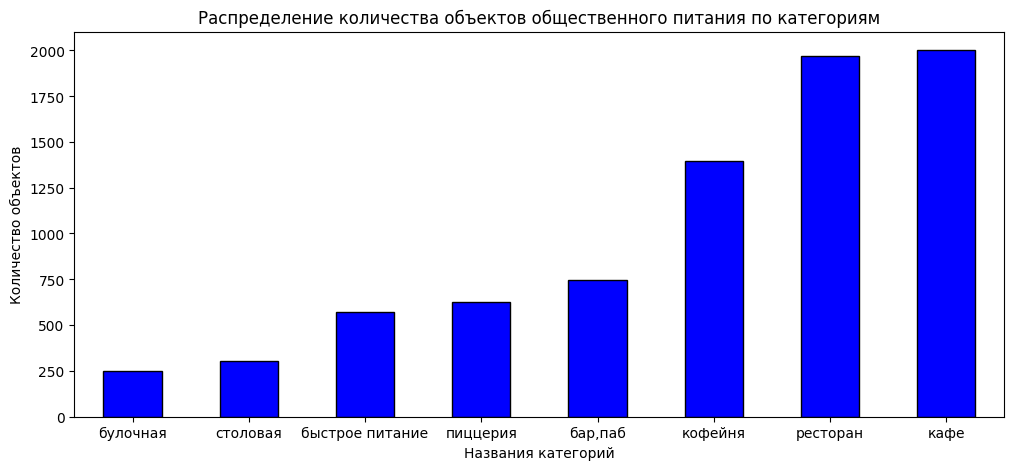

In [40]:
# Формируем данные
frac = df.groupby('category')['id'].count().sort_values()

# Для визуализации используем столбчатую диаграмму.
frac.plot(
    kind='bar',
    title='Распределение количества объектов общественного питания по категориям', 
    xlabel='Названия категорий', 
    ylabel='Количество объектов', 
    color='Blue', 
    edgecolor='Black', 
    rot=0,
    figsize=(12, 5)
)

plt.show()

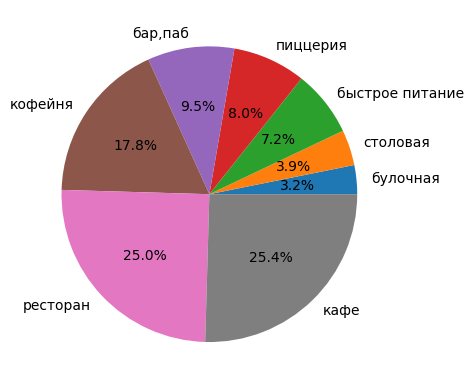

Количество объектов общественного питания по категориям:

category
кафе               2002
ресторан           1968
кофейня            1398
бар,паб             746
пиццерия            628
быстрое питание     570
столовая            306
булочная            249
Name: id, dtype: int64


In [41]:
# Используем круговую диаграмму для визуализации процентного соотношения категорий
plt.pie(frac, autopct='%1.1f%%', labels=frac.index)
plt.show()

print('Количество объектов общественного питания по категориям:\n')
print(frac.sort_values(ascending=False))

**Комментарий:**  
По столбчатой диаграмме можно заметить, что в Москве существенно преобладают по количеству заведений такие категории, как "Кафе" (2002 точки), "Ресторан" (1968 точек) и "Кофейня" (1398 точек). Меньше всего "Булочных" (249 точек) и "Столовых" (306 точек). "Бары/Пабы" (746 точек), "Пиццерии" (628 точек) и "Быстрое питание" (570 точек) по количеству ближе к "Булочным" и "Столовым".

По круговой диаграмме видно, что половину от всех объектов занимают "Кафе" (25,4%) и "Рестораны" (25,0%). На "Кофейни" приходится 17,8%.

## Изучение количества заведений по административным районам

Теперь перейдем к изучению количества заведений по административным районам, а также отдельно изучим распределение заведений каждой категории в "Центральном административном округе": 

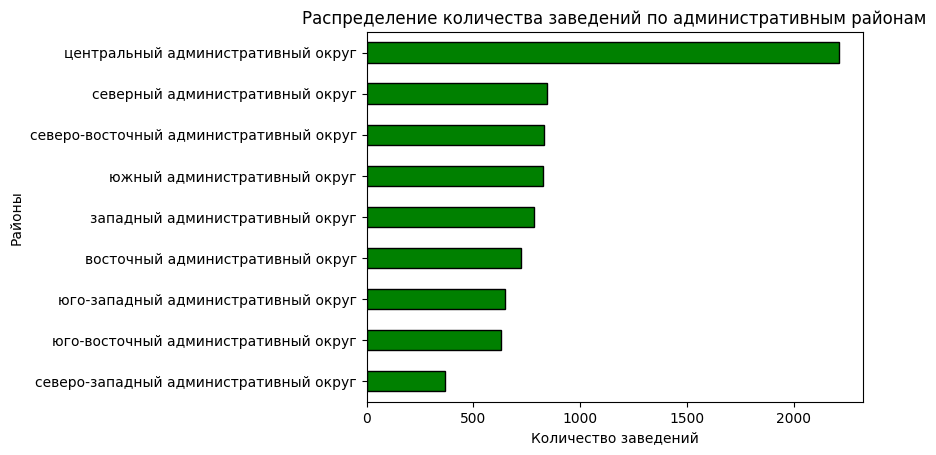

In [42]:
# Формируем данные
frac = df.groupby('district')['id'].count().sort_values()

# Для визуализации используем столбчатую диаграмму
frac.plot(
    kind='barh', 
    title='Распределение количества заведений по административным районам', 
    xlabel='Количество заведений', 
    ylabel='Районы',
    color='Green', 
    edgecolor='Black'
    
)

plt.show()

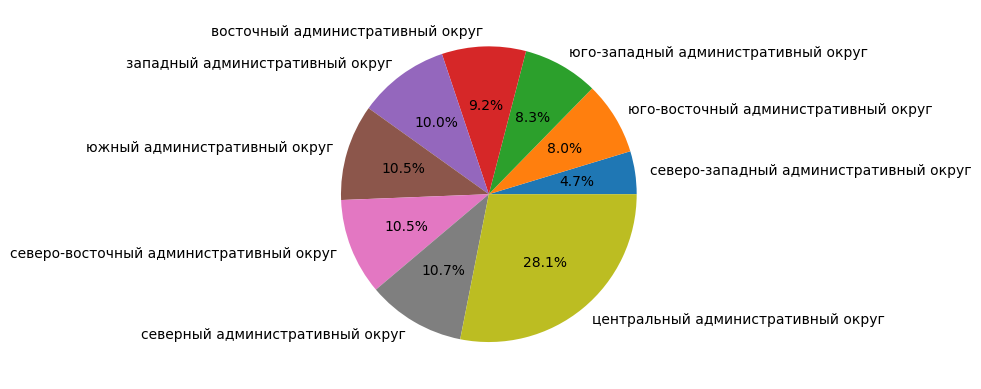

Количество объектов общественного питания по районам:

district
северо-западный административный округ      369
юго-восточный административный округ        629
юго-западный административный округ         650
восточный административный округ            723
западный административный округ             785
южный административный округ                827
северо-восточный административный округ     829
северный административный округ             844
центральный административный округ         2211
Name: id, dtype: int64


In [43]:
# Используем круговую диаграмму для визуализации процентного соотношения категорий
plt.pie(frac, autopct='%1.1f%%', labels=frac.index)
plt.show()

print('Количество объектов общественного питания по районам:\n')
print(frac)

**Комментарий:**  
Больше всего точек общественного питания сосредоточено в Центральном административном округе, что, в целом, ожидаемо исходя из названия округа (2211 точек, или 28,1%). Меньше всего — в Северо-Западном административном округе (369 точек, или 4,7%).  

Все остальные округа по численности точек примерно равны и находятся в диапазоне от 629 до 844 точек, или от 8% до 10,7%.

Можно сделать вывод о том, что в "Центральном административном округе" сосредоточена треть от всех заведений общественного питания.

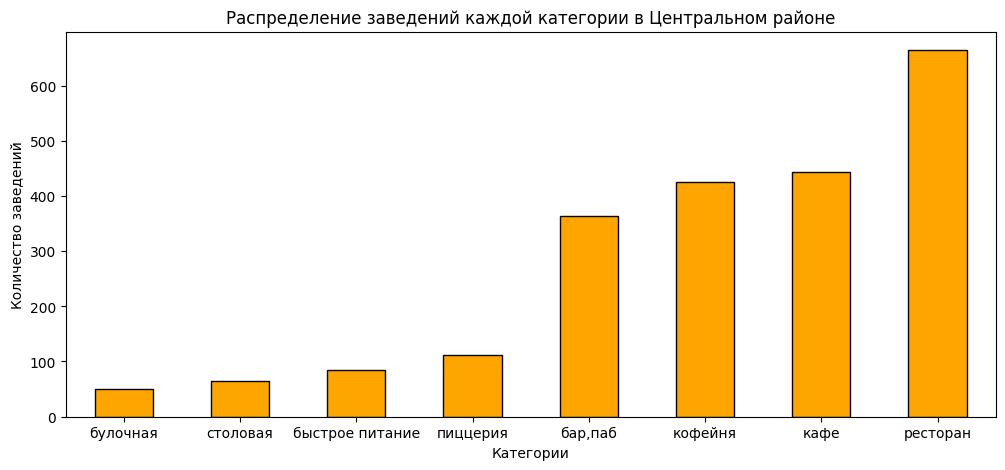

In [44]:
# Формируем данные
frac = df[df['district'] == 'центральный административный округ'].groupby('category')['id'].count().sort_values()

# Теперь визуализируем поведение категорий в "Центральном районе"
frac.plot(
    kind='bar',
    title='Распределение заведений каждой категории в Центральном районе', 
    xlabel='Категории', 
    ylabel='Количество заведений', 
    color='orange', 
    edgecolor='k',
    rot=0,
    figsize=(12, 5)
)

plt.show()

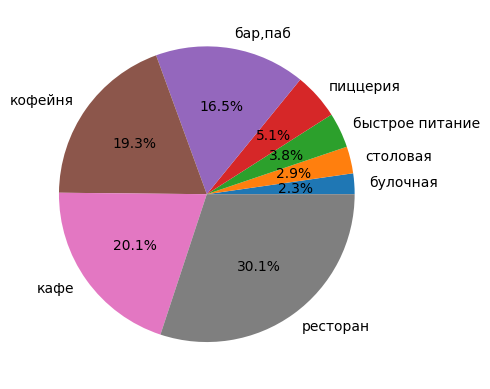

Количество объектов общественного питания по районам:

category
булочная            50
столовая            65
быстрое питание     85
пиццерия           112
бар,паб            364
кофейня            426
кафе               444
ресторан           665
Name: id, dtype: int64


In [45]:
# Используем круговую диаграмму для визуализации процентного соотношения категорий
plt.pie(frac, autopct='%1.1f%%', labels=frac.index)
plt.show()

print('Количество объектов общественного питания по районам:\n')
print(frac)

**Комментарий:**  
В Центральном административном округе (далее — ЦАО) сосредоточена большая часть заведений (28,1%). При сравнении распределения по категориям в Москве в целом и в ЦАО заметны явные различия. Прежде всего важно отметить, что в ЦАО наблюдается явный перекос в пользу ресторанов: 665 точек (30,1%) против 444 кафе (20,1%). Тогда как в Москве эти категории занимают примерно равные доли, хотя по-прежнему вместе составляют половину рынка. 

Доля и количество баров/пабов заметно выше — 364 точки (16,5%), кофеен — 426 (19,3%). Изменение в положительную сторону также коснулось остальных категорий. Пиццерии, столовые, булочные и заведения быстрого питания — все они по сути представляют сегмент быстрого обслуживания. Их доли снизились пропорционально примерно в 1,5–2 раза и сейчас в сумме составляют лишь 14,1% от всех заведений ЦАО. 

Из этого можно сделать вывод, что в ЦАО заведения быстрого питания пользуются меньшей популярностью. Это означает, что клиенты в центре чаще ориентированы на рестораны, чуть реже — на кафе, кофейни, бары и пабы.

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

## Cоотношение сетевых и несетевых заведений в разрезе категорий заведений.
Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения:

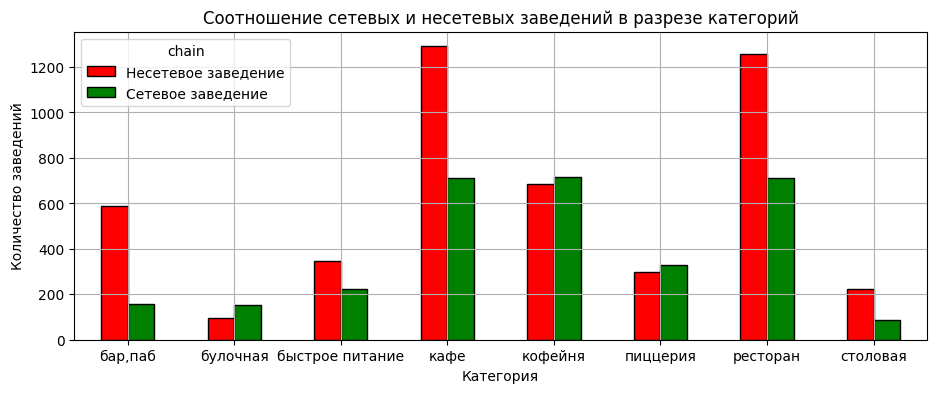

In [46]:
# Формируем данные
frac = df.groupby('category')['chain'].value_counts().unstack(fill_value=0)
frac = frac.rename(columns={True: 'Сетевое заведение', False: 'Несетевое заведение'})

# Визуализируем соотношение через столбчатую диаграмму
frac.plot(kind='bar',
          title='Соотношение сетевых и несетевых заведений в разрезе категорий',
          legend=True,
          ylabel='Количество заведений',
          xlabel='Категория',
          figsize=(11, 4), 
          rot=0, 
          color=['red', 'green'], 
          edgecolor='k'
         )
plt.grid()

# Выводим график
plt.show()

**Комментарий:**  
По соотношению сетевых и несетевых заведений в разрезе категорий можно сделать вывод, что "Пиццерии", "Кофейни" и "Булочные" стремятся к сетевому формату. У лидеров по числу точек — "Кафе", "Ресторанов" и "Баров/Пабов" — наблюдается существенный перекос в пользу несетевых заведений.

## Исследование количества посадочных мест в заведениях.
Исследуем количество посадочных мест в заведениях, а также посмотрим, какаое количество мест наиболее типично для каждой из категорий:

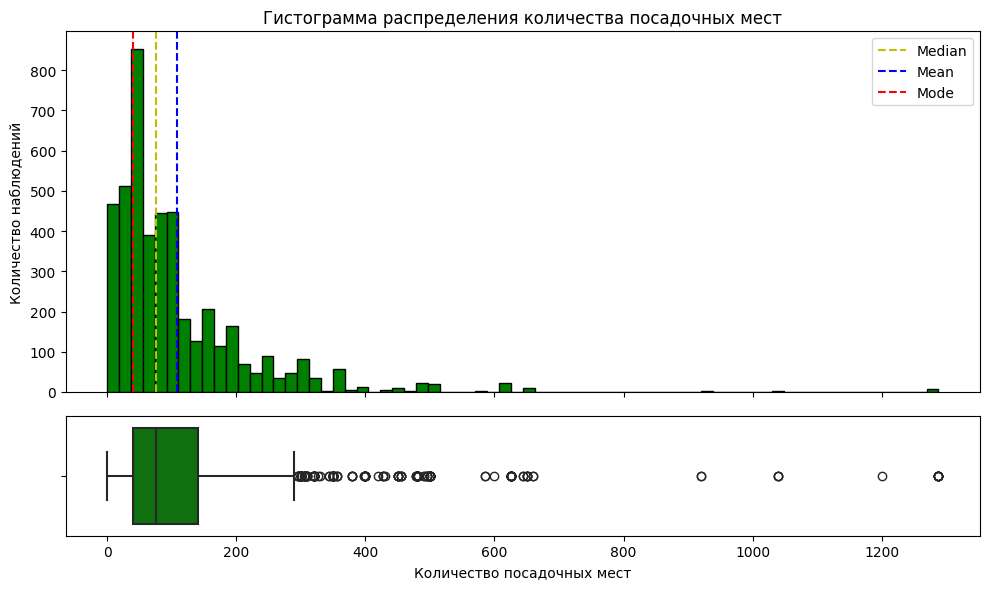

Метрики:


count    4493.000000
mean      107.818604
std       119.221230
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

In [47]:
# Формируем данные
frac = df['seats'].dropna()

fig, axes = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10, 6),
    sharex=True,
    gridspec_kw={'height_ratios': [3, 1]}
)

# Визуализируем распределение с помощью гистограммы и диаграммы размаха
counts, bins, patches = axes[0].hist(
    frac,
    bins=70,
    color='green',
    edgecolor='k',
)

# Вертикальные линии: медиана, среднее, мода
axes[0].axvline(x=frac.median(), color='y', linestyle='--', label='Median')
axes[0].axvline(x=frac.mean(), color='b', linestyle='--', label='Mean')
axes[0].axvline(x=frac.mode()[0], color='r', linestyle='--', label='Mode')

axes[0].set_title('Гистограмма распределения количества посадочных мест')
axes[0].set_ylabel("Количество наблюдений")
axes[1].set_xlabel("Количество посадочных мест")
axes[0].legend()

# Ящик с усами
sns.boxplot(
    x=frac,
    color='green',
    linewidth=1.5,
    ax=axes[1]
)

plt.tight_layout()
plt.show()

print('Метрики:')
frac.describe()

**Комментарий:**  
Распределение количества посадочных мест — правоасимметричное, что говорит о наличии значений, существенно превышающих медиану. На диаграмме размаха заметно большое количество выбросов свыше отметки в 350 мест. В основном данные сконцентрированы в диапазоне от 40 до 140 мест, что реально. Выбросы 1000+ мест также можно считать реальными, возможно в датасет попали данные о банкетных комплексах.

**Вопрос:**
У меня не может адекватно посчитаться сумма по полю `seats`. `df['seats'].sum()=np.inf`, как следствие и mean тоже. Поиск значений, свыше max и прямой поиск +-np.inf не дал результатов. Решение: Привести поле `seats` к типу `float32`. Но почему так? Изначально у меня был тип float16 (+-65504), а при проверке max('seats') = 1288?

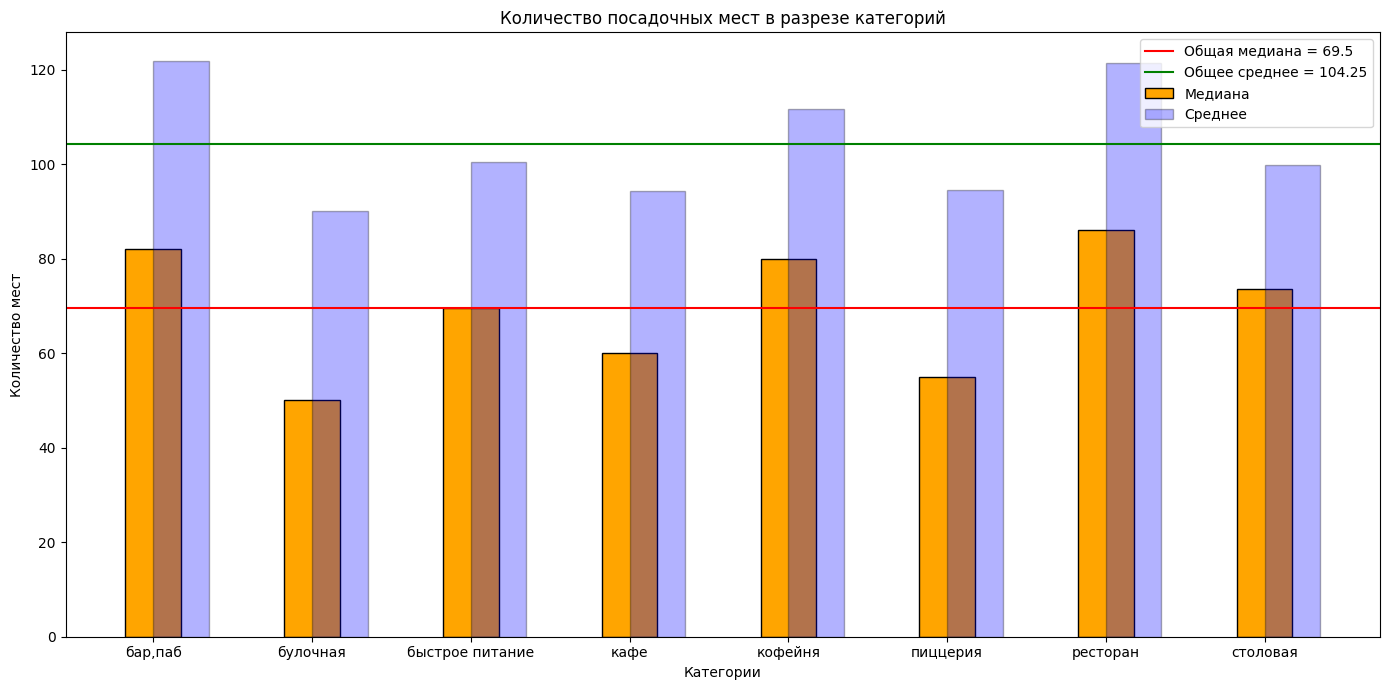

Метрики


,median,mean,min,max,diff_mean_median
category,,,,,
"бар,паб",82.0,121.809998,0.0,1288.0,39.809998
булочная,50.0,90.050003,0.0,625.0,40.050003
быстрое питание,69.5,100.449997,0.0,1040.0,30.949997
кафе,60.0,94.279999,0.0,1288.0,34.279999
кофейня,80.0,111.669998,0.0,1288.0,31.669998
пиццерия,55.0,94.620003,0.0,1288.0,39.620003
ресторан,86.0,121.400002,0.0,1288.0,35.400002
столовая,73.5,99.739998,0.0,1200.0,26.239998


In [48]:
# Формируем данные
frac = df.groupby('category')['seats'].agg(['median', 'mean', 'min', 'max']).round(2)

fig, ax = plt.subplots(figsize=(14, 7))


# Визуализируем с помощью столбчатой диаграммы медианные значения по категориям
ax.bar(
    frac.index, 
    frac['median'], 
    width=0.35, 
    label='Медиана', 
    color='Orange', 
    edgecolor='k'
)

# Визуализируем с помощью столбчатой диаграммы средние значения по категориям
ax.bar(
    frac.index, 
    frac['mean'], 
    width=0.35, 
    label='Среднее', 
    color='Blue', 
    edgecolor='k', 
    alpha=0.3, 
    align='edge'
)

ax.set_title('Количество посадочных мест в разрезе категорий')
ax.set_xlabel('Категории')
ax.set_ylabel('Количество мест')
ax.axhline(frac['median'].mean(), linestyle='-', color='Red', label=f"Общая медиана = {round(frac['median'].mean(),2)}")
ax.axhline(frac['mean'].mean(), linestyle='-', color='Green', label=f"Общее среднее = {round(frac['mean'].mean(), 2)}")
#plt.xticks(rotation=0)

ax.legend()
plt.tight_layout()
plt.show()


frac['diff_mean_median']= frac['mean'] - frac['median']
print('Метрики')
display(frac)


**Комментарий:**  
По графику видно, что выбросы не зависят от категории. У некоторых категорий повторяется один и тот же максимум, что порождает гипотезу: возможно, часть заведений расположена на фудкортах, и, поскольку посетители могут занять любое место на таком фудкорте, каждое заведение считает эти места своими. При этом, скорее всего, речь может идти об одном и том же фудкорте, так как количество мест совпадает.

Что касается типичных значений (медиан): наибольшие показатели у "Баров/Пабов" (82 места), "Ресторанов" (86 мест) и "Кофеен" (80 мест); чуть ниже — у "Быстрого питания" (69–70 мест) и "Столовых" (73–74 места). Меньше всего мест в "Пиццериях" (55 мест), "Булочных" (50 мест) и "Кафе" (60 мест).

## Исследование рейтинга заведений
Исследуем рейтинг заведений. Визуализируем распределение средних рейтингов по категориям заведений.

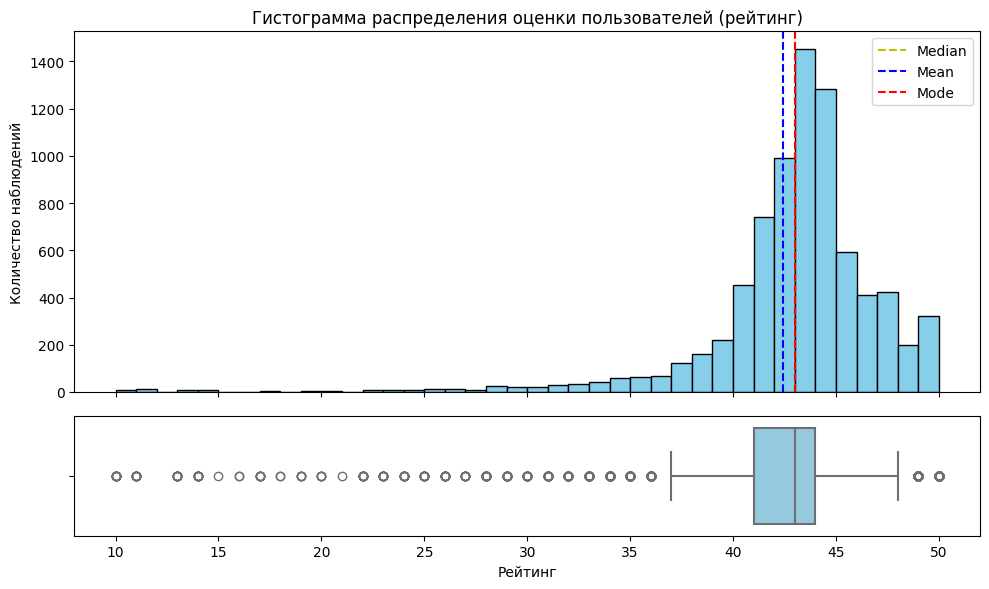

Метрики:


count    7867.000000
mean       42.442990
std         4.528958
min        10.000000
25%        41.000000
50%        43.000000
75%        44.000000
max        50.000000
Name: rating, dtype: float64

In [49]:
# Формируем данные
frac = df['rating'].dropna()

fig, axes = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10, 6),
    sharex=True,
    gridspec_kw={'height_ratios': [3, 1]}
)

# Визуализируем распределение с помощью гистограммы и диаграммы размаха
counts, bins, patches = axes[0].hist(
    frac,
    bins=40,
    color='skyblue',
    edgecolor='k',
)

# Вертикальные линии: медиана, среднее, мода
axes[0].axvline(x=frac.median(), color='y', linestyle='--', label='Median')
axes[0].axvline(x=frac.mean(), color='b', linestyle='--', label='Mean')
axes[0].axvline(x=frac.mode()[0], color='r', linestyle='--', label='Mode')

axes[0].set_title('Гистограмма распределения оценки пользователей (рейтинг)')
axes[0].set_ylabel("Количество наблюдений")
axes[1].set_xlabel("Рейтинг")
axes[0].legend()

# Ящик с усами
sns.boxplot(
    x=frac,
    color='skyblue',
    linewidth=1.5,
    ax=axes[1]
)

plt.tight_layout()
plt.show()

print('Метрики:')
display(frac.describe())

**Комментарий:**  
Наблюдается левоасимметричное распределение, при этом медиана равна моде и составляет 43. Выбросы присутствуют как на левом, так и на правом хвосте распределения. Исходя из распределения, можно сделать вывод, что рейтинг всех заведений варьируется в пределах от 37 до 48 (то есть от 3,7 до 4,8).

Теперь меры центральной тенденции в разрезе категорий:

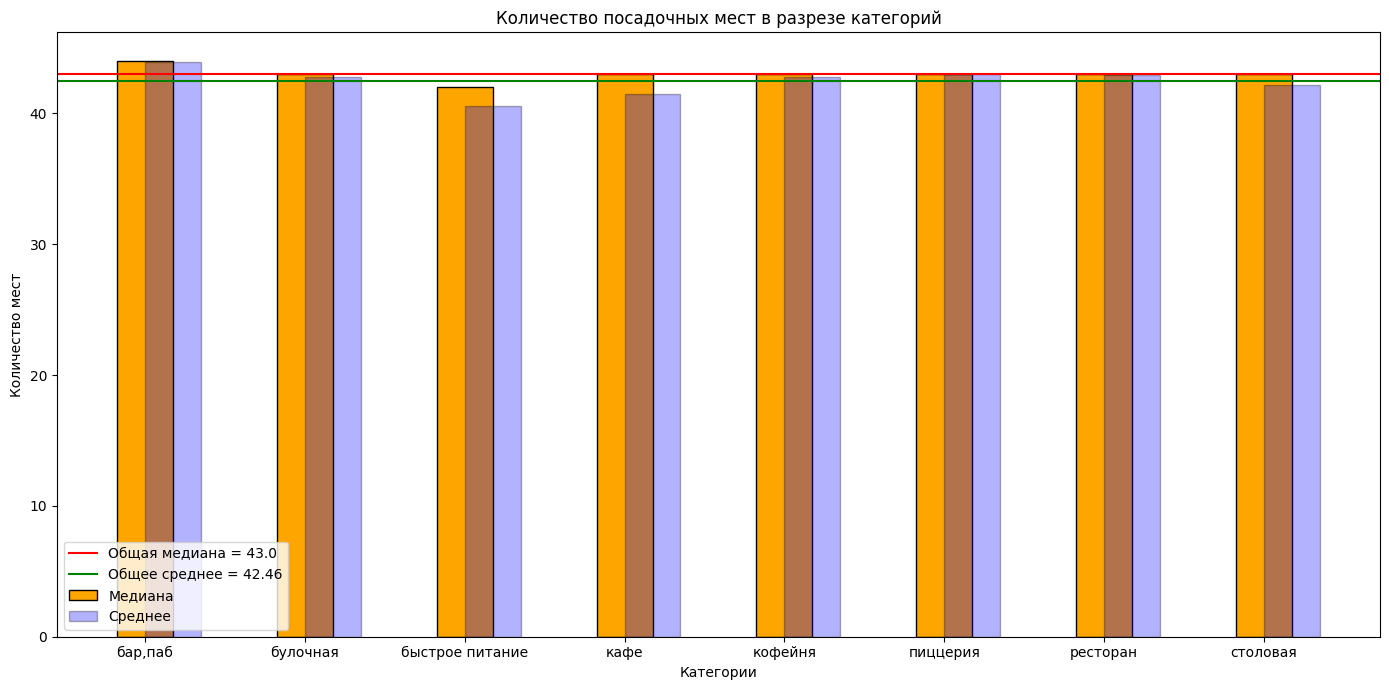

Метрики


,median,mean,diff_mean_median
category,,,
"бар,паб",44.0,43.95,-0.05
булочная,43.0,42.77,-0.23
быстрое питание,42.0,40.59,-1.41
кафе,43.0,41.51,-1.49
кофейня,43.0,42.75,-0.25
пиццерия,43.0,43.01,0.01
ресторан,43.0,42.96,-0.04
столовая,43.0,42.17,-0.83


In [50]:
# Формируем данные
frac = df.groupby('category')['rating'].agg(['median', 'mean']).round(2)

fig, ax = plt.subplots(figsize=(14, 7))


# Визуализируем с помощью столбчатой диаграммы медианные значения по категориям
ax.bar(
    frac.index, 
    frac['median'], 
    width=0.35, 
    label='Медиана', 
    color='Orange', 
    edgecolor='k'
)

# Визуализируем с помощью столбчатой диаграммы средние значения по категориям
ax.bar(
    frac.index, 
    frac['mean'], 
    width=0.35, 
    label='Среднее', 
    color='Blue', 
    edgecolor='k', 
    alpha=0.3, 
    align='edge'
)

ax.set_title('Количество посадочных мест в разрезе категорий')
ax.set_xlabel('Категории')
ax.set_ylabel('Количество мест')
ax.axhline(frac['median'].mean(), linestyle='-', color='Red', label=f"Общая медиана = {round(frac['median'].mean(),2)}")
ax.axhline(frac['mean'].mean(), linestyle='-', color='Green', label=f"Общее среднее = {round(frac['mean'].mean(), 2)}")
#plt.xticks(rotation=0)

ax.legend()
plt.tight_layout()
plt.show()


frac['diff_mean_median']= frac['mean'] - frac['median']
print('Метрики')
display(frac)


**Комментарий:**
В целом, средние рейтинги по категориям не сильно отличаются друг от друга, причём медиана и среднее также практически совпадают. Это говорит о том, что категория заведения не является существенным фактором при оценке.

## Корреляции с рейтингом заведений
Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений. 

interval columns not set, guessing: ['rating', 'seats', 'middle_avg_bill', 'middle_coffee_cup', 'middle_beer_cup', 'hours_on_week', 'hours_on_weekend']


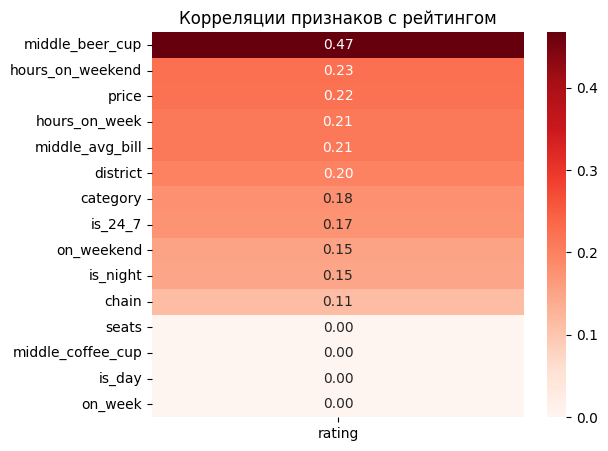

In [51]:
target = 'rating'

# Колонки, которые не нужны для корреляций
drop_cols = [
    'id', 'name', 'address', 'hours', 'avg_bill'
]

# Формируем список признаков автоматически
phik_cols = [c for c in df.columns if c not in drop_cols]

# Считаем phik
phik_corr = df[phik_cols].phik_matrix()

# Корреляции с рейтингом
rating_corr = phik_corr[target].sort_values(ascending=False)

plt.figure(figsize=(6, 5))

sns.heatmap(
    rating_corr.to_frame().drop('rating'),
    cmap='Reds',
    annot=True,
    fmt='.2f'
)

plt.title('Корреляции признаков с рейтингом')
plt.show()

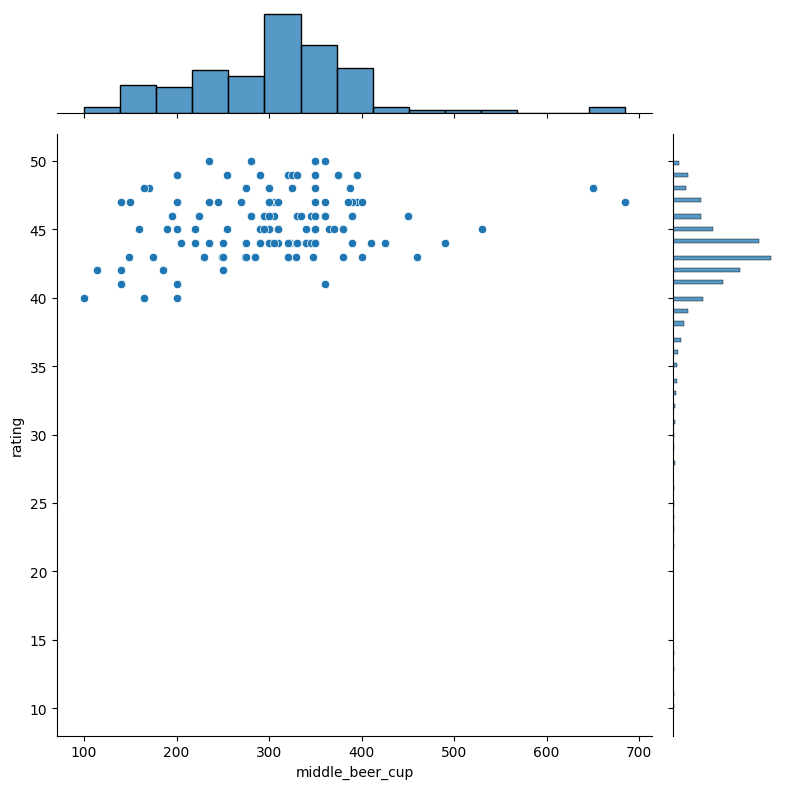

In [52]:
# Проверка 
sns.jointplot(data=df, x='middle_beer_cup', y='rating', height=8)
plt.show()

**Комментарий:**

Сильных корреляций не обнаружено, однако выявлена умеренная корреляция рейтинга со средней ценой бокала пива (0,47). Также найдены слабые положительные связи рейтинга с ценой (0,27), количеством рабочих часов в выходные (0,23) и в будние дни (0,21), средней ценой счёта (0,21), расположением (0,20), категорией заведения (0,18), круглосуточным режимом работы (0,17), работой в выходные (0,15), работой в ночное время (0,15) и принадлежностью к сети (0,11). 

Большинство признаков имеют слабую связь с рейтингом. Наиболее сильная зависимость наблюдается между рейтингом и средней ценой за бокал пива. Это означает, что уровень цен действительно влияет на восприятие качества заведения. Также можно отметить косвенное влияние работы по выходным и в целом продолжительности рабочего времени.

Проверка показала, что бары со средней ценой больше всего нравятся людям. Возможно, это также связано со стилем заведения или подготовкой персонала.

## Топ-15 сетей ОП
Выделим топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [53]:
frac = (df[df['chain'] == True].groupby(['name', 'category'])
    .agg(
        count=('id', 'count'),
        mean_rating=('rating', 'mean')
    )
    .sort_values('count', ascending=False)
)

frac = frac.reset_index(level='category')

display(frac.head(15))

print(f"Коэф. кор. Cпирмена по связи Количества точек и среднему рейтингу сети: {round(frac['count'].corr(frac['mean_rating'], method='spearman'),3)}")


,category,count,mean_rating
name,,,
шоколадница,кофейня,119,41.781513
домино'с пицца,пиццерия,76,41.697368
додо пицца,пиццерия,74,42.864865
one price coffee,кофейня,71,40.647887
яндекс лавка,ресторан,68,38.705882
cofix,кофейня,65,40.753846
prime,ресторан,49,41.142857
кофепорт,кофейня,42,41.476190
кулинарная лавка братьев караваевых,кафе,39,43.948718


Коэф. кор. Cпирмена по связи Количества точек и среднему рейтингу сети: 0.013


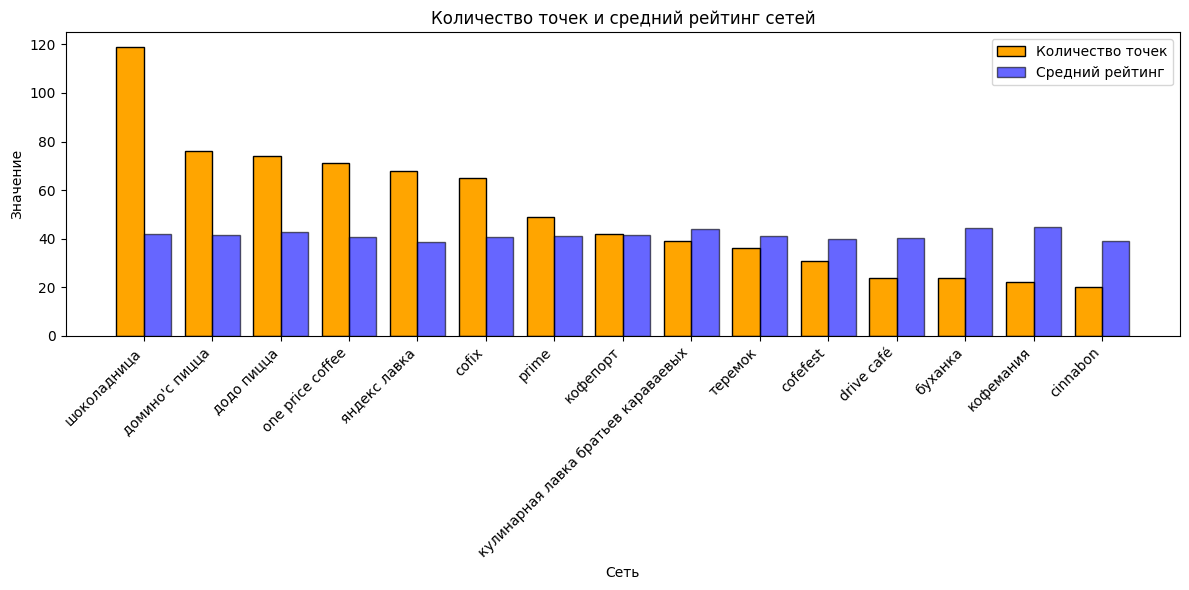

In [54]:
frac_plot = frac.head(15)

x = np.arange(len(frac_plot))  # позиции
width = 0.4

fig, ax = plt.subplots(figsize=(12, 6))

# Количество точек
ax.bar(
    x - width/2,
    frac_plot['count'],
    width=width,
    label='Количество точек',
    color='orange',
    edgecolor='k'
)

# Средний рейтинг
ax.bar(
    x + width/2,
    frac_plot['mean_rating'],
    width=width,
    label='Средний рейтинг',
    color='blue',
    edgecolor='k',
    alpha=0.6
)

ax.set_title('Количество точек и средний рейтинг сетей')
ax.set_xlabel('Сеть')
ax.set_ylabel('Значение')

ax.set_xticks(x)
ax.set_xticklabels(frac_plot.index, rotation=45, ha='right')

ax.legend()

plt.tight_layout()
plt.show()

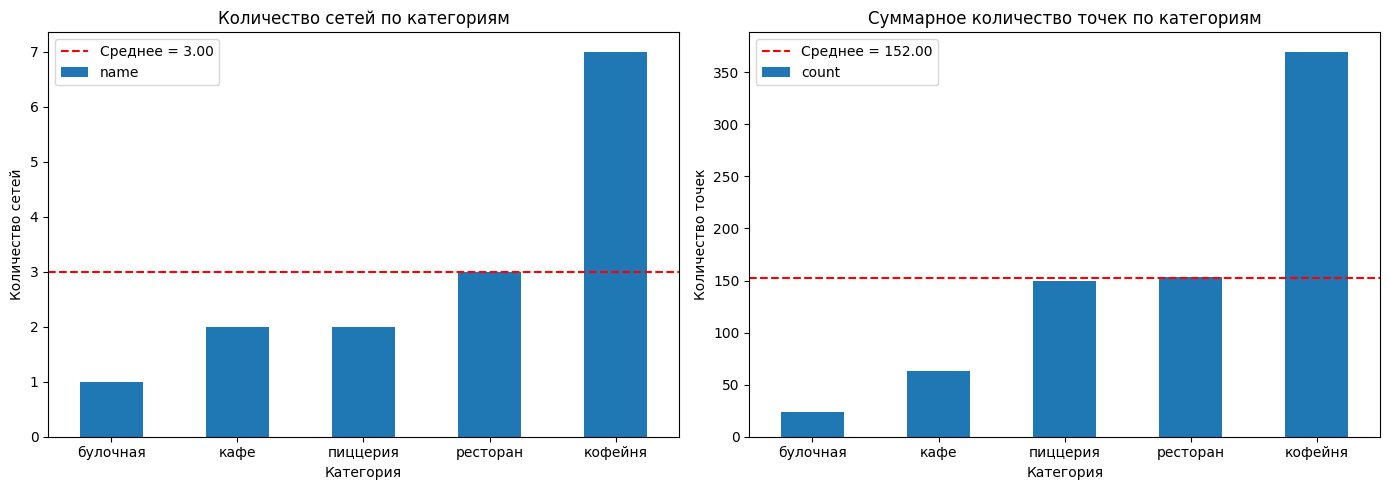

In [55]:
# Формируем данные
frac_cat = frac_plot.reset_index()[['name', 'category']]

counts_of_categories = (
    frac_cat
    .groupby('category')['name']
    .count()
    .sort_values()
)

frac_dims_cat = (
    frac_plot
    .groupby('category')['count']
    .sum()
    .sort_values()
)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Количество сетей в категории
counts_of_categories.plot(
    kind='bar',
    ax=axes[0]
)

axes[0].set_title('Количество сетей по категориям')
axes[0].set_xlabel('Категория')
axes[0].set_ylabel('Количество сетей')
axes[0].axhline(
    counts_of_categories.mean(),
    color='red',
    linestyle='--',
    label=f'Среднее = {counts_of_categories.mean():.2f}'
)
axes[0].legend()
axes[0].tick_params(axis='x', rotation=0)


# Суммарное количество точек по сетям в категориях
frac_dims_cat.plot(
    kind='bar',
    ax=axes[1]
)

axes[1].set_title('Суммарное количество точек по категориям')
axes[1].set_xlabel('Категория')
axes[1].set_ylabel('Количество точек')
axes[1].axhline(
    frac_dims_cat.mean(),
    color='red',
    linestyle='--',
    label=f'Среднее = {frac_dims_cat.mean():.2f}'
)
axes[1].legend()
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

**Комментарий:**  
Значение коэффициента корреляции между количеством точек и средним рейтингом сети несущественно. Визуализация это косвенно подтверждает: средний рейтинг находится примерно на одном уровне и не сильно варьируется. Однако незначительная разница всё же есть: у более маленьких сетей рейтинг в среднем выше на 2,5 пункта. Вероятно, более качественный сервис становится их конкурентным преимуществом по сравнению с крупными сетями.

Также можно заметить, что наиболее крупные сети — это кофейни, и их присутствие в топе подавляющее. Все остальные категории сохраняют пропорциональную убывающую тенденцию: чем менее численная категория, тем меньше в топе сетей этой категории.

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.

In [56]:
frac = df.dropna(subset=['middle_avg_bill'])

bill_by_district = (
    frac
    .groupby('district')['middle_avg_bill']
    .agg(['mean', 'median', 'count'])
    .sort_values('mean', ascending=False)
)

bill_by_district

/Users/achezganov/Documents/GitHub/msk_food_investment_research/venv/lib/python3.12/site-packages/pandas/io/formats/format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,mean,median,count
district,,,
центральный административный округ,1190.557251,1000.0,1057
западный административный округ,1053.065552,1000.0,305
северный административный округ,927.953430,650.0,322
южный административный округ,836.326904,500.0,312
северо-западный административный округ,822.222900,700.0,157
восточный административный округ,820.626953,575.0,260
юго-западный административный округ,792.561707,600.0,235
северо-восточный административный округ,716.611267,500.0,301
юго-восточный административный округ,654.097961,450.0,194


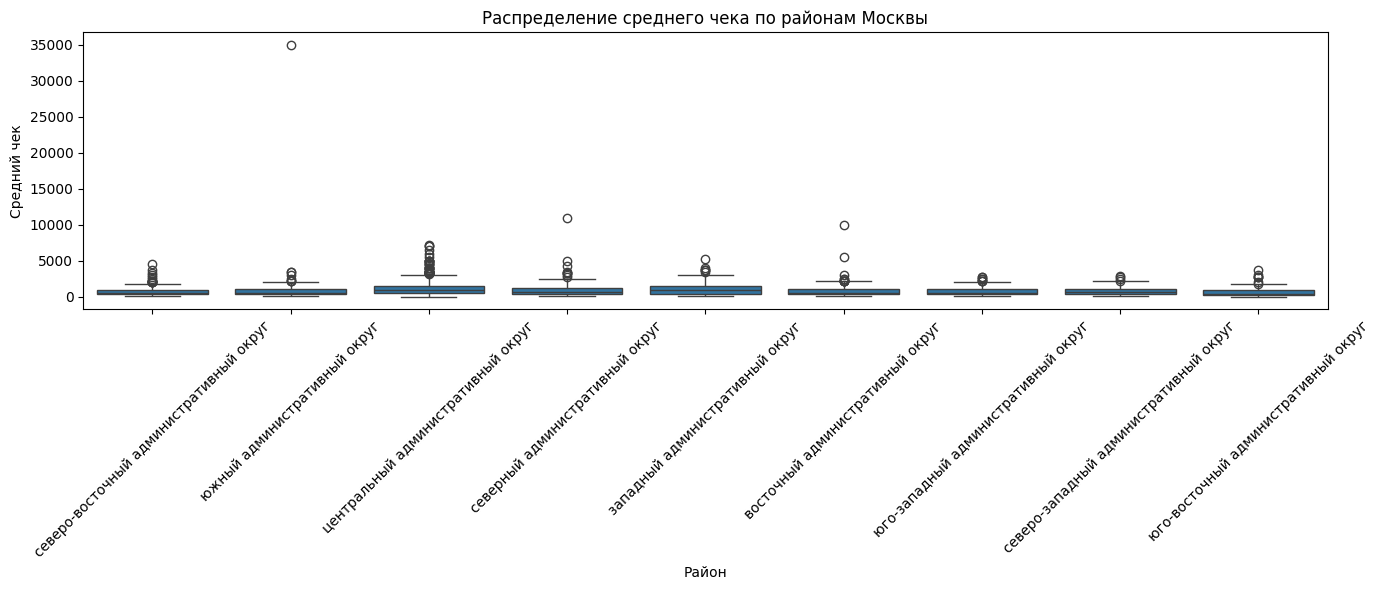

In [57]:
# Выведем диаграмму размаха "в лоб" по метрикам в разрезе районов
plt.figure(figsize=(14,6))

sns.boxplot(
    data=frac,
    x='district',
    y='middle_avg_bill'
)

plt.xticks(rotation=45)
plt.title('Распределение среднего чека по районам Москвы')
plt.xlabel('Район')
plt.ylabel('Средний чек')
plt.tight_layout()
plt.show()

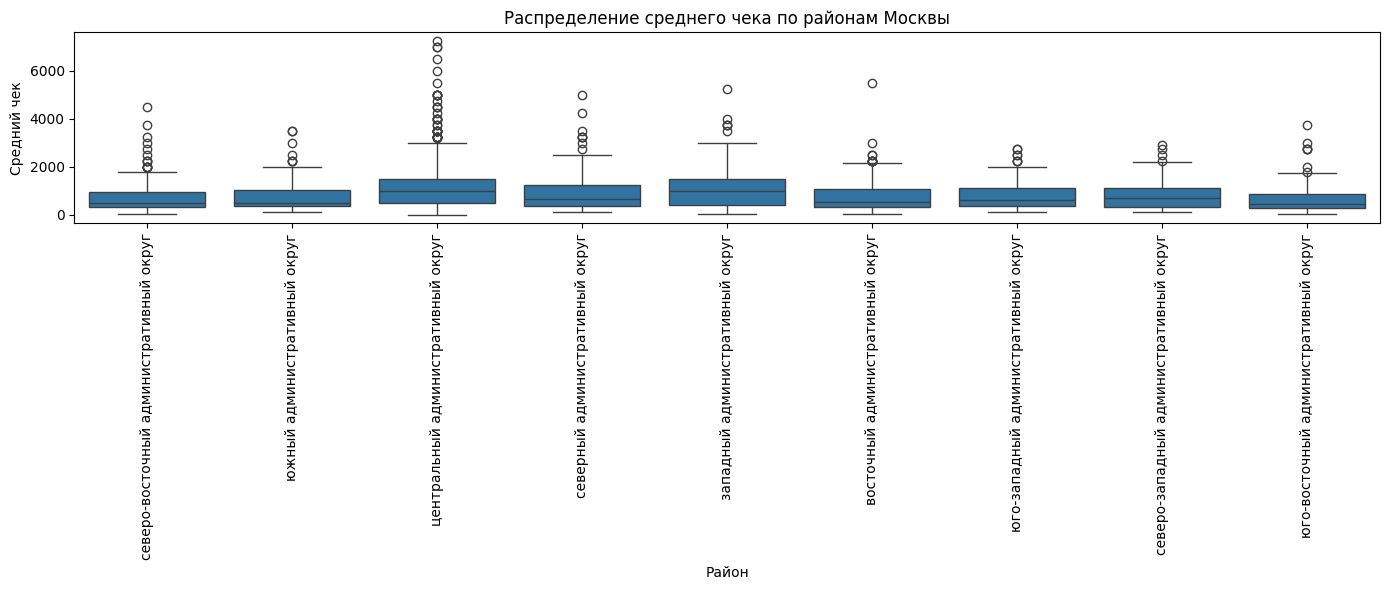

In [58]:
# Для улоучшения восприятия ограничим лимит включения для выбросов
plt.figure(figsize=(14,6))
sns.boxplot(
    data=frac[frac['middle_avg_bill'] < 10000],
    x='district',
    y='middle_avg_bill'
)

plt.xticks(rotation=90)
plt.title('Распределение среднего чека по районам Москвы')
plt.xlabel('Район')
plt.ylabel('Средний чек')
plt.tight_layout()
plt.show()

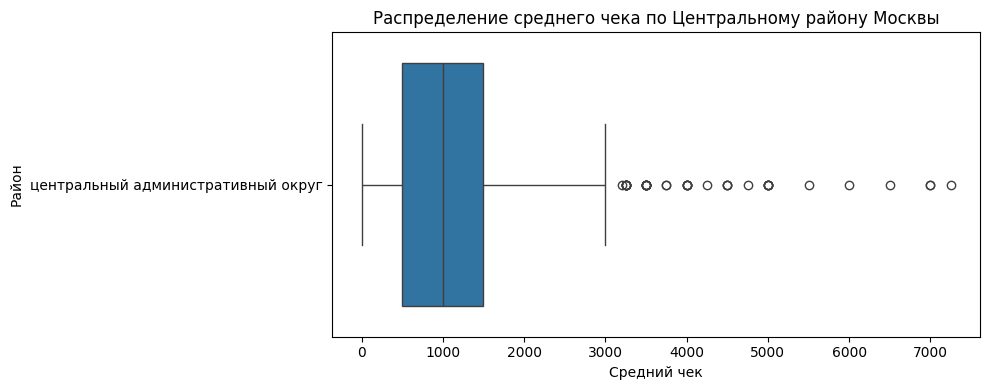

In [59]:
# Выведем диаграмму размаха для ЦАО
plt.figure(figsize=(10,4))
sns.boxplot(
    data=frac[frac['district'] == 'центральный административный округ'],
    x='middle_avg_bill',
    y='district'
)

plt.xticks()
plt.title('Распределение среднего чека по Центральному району Москвы')
plt.xlabel('Средний чек')
plt.ylabel('Район')
plt.tight_layout()
plt.show()

**Комментарий:**
Вариация среднего чека по районам Москвы выражена умеренно, однако Центральный административный округ заметно выделяется на фоне остальных. Визуализация это наглядно демонстрирует: медиана среднего чека в ЦАО выше, а межквартильный размах шире, что говорит о большей ценовой дифференциации внутри округа. Кроме того, именно в центре наблюдается наибольшее количество высоких выбросов — представлены заведения премиального сегмента с чеком существенно выше среднего по городу.

В остальных округах распределение более компактное: медианные значения ниже, разброс меньше, экстремально высокие значения встречаются реже. Это указывает на преобладание среднего и бюджетного сегмента вне центра.

Таким образом, удалённость от центра оказывает заметное влияние на уровень цен: по мере удаления от ЦАО средний чек снижается, а ценовая вариативность становится менее выраженной. Вероятно, это связано с более высокой арендной нагрузкой, концентрацией деловой активности и туристического потока в центре города, что формирует отдельный, более дорогой ценовой сегмент.

## Итоговый вывод и рекомендации

### Зафиксируем полученную информацию:
- По количеству точек лидируют "кафе", "рестораны" и "кофейни" — это основа рынка.
- В ЦАО заведений много (28,1% всех точек), заметно больше ресторанов, кофеен и баров/пабов, а "быстрого питания" относительно меньше.
- Сетевой формат сильнее проявляется в "кофейнях", "пиццериях" и "булочных". В "кафе", "ресторанах" и "барах/пабах" чаще встречаются несетевые заведения.
- По рейтингу: категория сама по себе почти не объясняет оценку. Есть умеренная связь рейтинга со средней ценой бокала пива, а также слабые связи с ценой / средним чеком и временем работы.

### Рекомендации:

Если планируется открываться в центре, делать ставку на форматы: рестораны, кофейни, бары/пабы. Потенциал по чеку выше, но и риски (аренда, конкуренция) тоже выше.

Если планируется плавный старт, рекомендую рассмотреть округа, где заведений меньше всего, — например, Северо-Западный административный округ. Полагаю, что в таких районах лучше открывать быстрое питание или булочные, можно также кофейни.

Сетевой рынок сильнее заметен в кофейнях, пиццериях и булочных. Как вариант можно рассмотреть франшизу.